In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **1.before data cleaning**

## 1.1Pengenalan data

In [2]:
P23 = pd.read_csv('male 23.csv')

C:\Users\cicog\AppData\Local\Temp\ipykernel_21156\3092925914.py:1: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  P23 = pd.read_csv('male 23.csv')


In [3]:
print(f"Jumlah data di 2023: {P23.shape[0]}")

Jumlah data di 2023: 10003590


In [4]:
P23.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/230009,23,9,2023-01-13,L. Messi,Lionel Andrés Messi Cuccittini,RW,91,91,...,63+3,63+3,64+3,59+3,50+3,50+3,50+3,59+3,19+3,https://cdn.sofifa.net/players/158/023/23_120.png
1,165153,/player/165153/karim-benzema/230009,23,9,2023-01-13,K. Benzema,Karim Benzema,"CF, ST",91,91,...,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3,https://cdn.sofifa.net/players/165/153/23_120.png
2,188545,/player/188545/robert-lewandowski/230009,23,9,2023-01-13,R. Lewandowski,Robert Lewandowski,ST,91,91,...,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/23_120.png
3,192985,/player/192985/kevin-de-bruyne/230009,23,9,2023-01-13,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,79+3,79+3,78+3,74+3,68+3,68+3,68+3,74+3,21+3,https://cdn.sofifa.net/players/192/985/23_120.png
4,231747,/player/231747/kylian-mbappe/230009,23,9,2023-01-13,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,...,63+3,63+3,67+3,63+3,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/23_120.png


In [5]:
print(P23.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10003590 entries, 0 to 10003589
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 8.2+ GB
None


![Data_Mentah](kolom_awal.png)

## 1.2Penghapusan kolom ga penting

In [6]:
# List kolom yang ingin dihapus
kolom_yang_dihapus = [
    'player_id', 'player_url', 'fifa_update_date', 'short_name', 'potential',
    'dob', 'player_positions', 'club_jersey_number', 'club_loaned_from',
    'club_joined_date', 'club_contract_valid_until_year', 'nation_team_id',
    'nation_position', 'nation_jersey_number', 'real_face', 'goalkeeping_speed',
    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
    'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb',
    'cb', 'rcb', 'rb', 'gk', 'player_face_url'
]
df = P23.drop(columns=kolom_yang_dihapus)


## 1.3Ambil data base stats

In [7]:
# Filter data dengan nilai "fifa_update" yang sama dengan 1
df1 = df[df['fifa_update'] == 1]

# Menampilkan data yang telah difilter
df1


,fifa_version,fifa_update,long_name,overall,value_eur,wage_eur,age,height_cm,weight_kg,league_id,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
148298,23,1,Lionel Andrés Messi Cuccittini,91,54000000.0,195000.0,35,169,67,16.0,...,75,96.0,20,35,24,6,11,15,14,8
148299,23,1,Karim Benzema,91,64000000.0,450000.0,34,185,81,53.0,...,84,90.0,43,24,18,13,11,5,5,7
148300,23,1,Robert Lewandowski,91,84000000.0,420000.0,33,185,81,53.0,...,90,88.0,35,42,19,15,6,12,8,10
148301,23,1,Kevin De Bruyne,91,107500000.0,350000.0,31,181,70,13.0,...,83,89.0,68,65,53,15,13,5,10,13
148302,23,1,Kylian Mbappé Lottin,91,190500000.0,230000.0,23,182,73,16.0,...,80,88.0,26,34,32,13,5,7,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10003585,15,1,Marcus Maier,42,25000.0,2000.0,18,174,70,80.0,...,21,NaN,31,25,35,15,6,14,10,7
10003586,15,1,Lee Marshall,42,25000.0,2000.0,17,179,71,60.0,...,37,NaN,32,36,45,6,14,8,13,5
10003587,15,1,Ellis Redman,41,20000.0,2000.0,17,187,81,61.0,...,31,NaN,38,40,35,12,6,15,8,6
10003588,15,1,Paul Tisdale,40,NaN,2000.0,41,175,72,61.0,...,55,NaN,27,34,29,5,6,14,8,13


In [8]:
df1.to_csv('15 sampai 23 (Base Stats) .csv', index=False)

## 1.4Pengambilan data 5% player saja

In [9]:
df1 = pd.read_csv('15 sampai 23 (Base Stats) .csv')

In [10]:
df1_05 = pd.DataFrame()

for year in range(15, 24):
    players_year = df1[df1['fifa_version'] == year]
    n_top_players = int(len(players_year) * 0.05) 
    top_players_year = players_year.nlargest(n_top_players, 'overall') 
    df1_05 = pd.concat([df1_05, top_players_year])
df1_05.reset_index(drop=True, inplace=True)

print("Jumlah baris setelah pengambilan 5% pemain teratas dari setiap tahun:", len(df1_05))



Jumlah baris setelah pengambilan 5% pemain teratas dari setiap tahun: 8033


In [11]:
df1_05['overall'].value_counts()

78    1633
79    1491
80    1167
81     829
82     701
83     520
77     429
84     373
85     229
86     164
87     129
76     113
88      97
89      69
90      41
91      24
92      11
93       7
94       6
Name: overall, dtype: int64

## 1.5Perbaikan data null

In [12]:
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())

Kolom dengan nilai kosong beserta jumlah data nullnya:
value_eur               113
wage_eur                 96
league_id                99
league_name              99
league_level            137
club_team_id             99
club_name                99
club_position            99
release_clause_eur     2718
player_tags            5048
player_traits           903
pace                    936
shooting                936
passing                 936
dribbling               936
defending               936
physic                  936
mentality_composure    1646
dtype: int64
Total jumlah data null: 16772


In [13]:
df1_05.dropna(subset=['value_eur', 'wage_eur', 'league_id', 'league_name', 'league_level', 'club_team_id', 'club_name', 'club_position'], inplace=True)



In [14]:
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())

Kolom dengan nilai kosong beserta jumlah data nullnya:
release_clause_eur     2587
player_tags            4947
player_traits           886
pace                    913
shooting                913
passing                 913
dribbling               913
defending               913
physic                  913
mentality_composure    1605
dtype: int64
Total jumlah data null: 15503


In [15]:
data_null_all_skills = df1_05[df1_05[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].isnull().all(axis=1)]

data_null_all_skills[['long_name', 'club_position']]



,long_name,club_position
4,Manuel Peter Neuer,GK
31,Thibaut Nicolas Marc Courtois,GK
33,Petr Čech,SUB
36,Hugo Lloris,GK
45,Iker Casillas Fernández,GK
...,...,...
7963,José Manuel Reina Páez,SUB
7988,Aitor Fernández Abarisketa,SUB
7992,Rafał Gikiewicz,GK
8002,Benjamin Lecomte,GK


Jadi setelah penelitian saya saya menemukan bahwa yang memiliki data null pada kolom

'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'

Itu adalah semua goalkeeper atau penjaga gawang Jadi mereka startnya itu berbeda mereka punya aturannya sekarang saya ingin tidak saya tidak akan menghapus data now tapi saya akan mengisi dengan angka 0

Di tiap data nol dengan posisi pemain adalah GK di kolom
club_position

In [16]:
kondisi = (df1_05['club_position'] == 'GK')

df1_05.loc[kondisi, ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']] = 0


In [17]:
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())

Kolom dengan nilai kosong beserta jumlah data nullnya:
release_clause_eur     2587
player_tags            4947
player_traits           886
pace                    204
shooting                204
passing                 204
dribbling               204
defending               204
physic                  204
mentality_composure    1605
dtype: int64
Total jumlah data null: 11249


In [18]:
data_null_all_skills = df1_05[df1_05[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].isnull().all(axis=1)]

data_null_all_skills[['long_name', 'club_position','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

,long_name,club_position,pace,shooting,passing,dribbling,defending,physic
33,Petr Čech,SUB,NaN,NaN,NaN,NaN,NaN,NaN
89,Claudio Andrés Bravo Muñoz,SUB,NaN,NaN,NaN,NaN,NaN,NaN
154,José Manuel Reina Páez,SUB,NaN,NaN,NaN,NaN,NaN,NaN
228,Francisco Guillermo Ochoa Magaña,SUB,NaN,NaN,NaN,NaN,NaN,NaN
305,Michel Vorm,SUB,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
7849,Thomas Strakosha,SUB,NaN,NaN,NaN,NaN,NaN,NaN
7869,Gabriel Arias Arroyo,SUB,NaN,NaN,NaN,NaN,NaN,NaN
7963,José Manuel Reina Páez,SUB,NaN,NaN,NaN,NaN,NaN,NaN
7988,Aitor Fernández Abarisketa,SUB,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
kondisi = (df1_05['club_position'] == 'SUB')

df1_05.loc[kondisi, ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']] = 0


In [20]:
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())

Kolom dengan nilai kosong beserta jumlah data nullnya:
release_clause_eur     2587
player_tags            4947
player_traits           886
pace                     27
shooting                 27
passing                  27
dribbling                27
defending                27
physic                   27
mentality_composure    1605
dtype: int64
Total jumlah data null: 10187


In [21]:
data_null_all_skills = df1_05[df1_05[['release_clause_eur']].isnull().all(axis=1)]

data_null_all_skills[['long_name', 'club_position','release_clause_eur']]

,long_name,club_position,release_clause_eur
0,Lionel Andrés Messi Cuccittini,CF,NaN
1,Cristiano Ronaldo dos Santos Aveiro,LW,NaN
2,Arjen Robben,RM,NaN
3,Zlatan Ibrahimović,ST,NaN
4,Manuel Peter Neuer,GK,NaN
...,...,...,...
7925,Moise Bioty Kean,LW,NaN
7993,Florian Lejeune,RCB,NaN
8001,Víctor Machín Pérez,LM,NaN
8002,Benjamin Lecomte,GK,NaN


In [22]:
df1_05['release_clause_eur'] = df1_05['release_clause_eur'].fillna(0)

print(df1_05[['long_name', 'club_position', 'release_clause_eur']])


                                long_name club_position  release_clause_eur
0          Lionel Andrés Messi Cuccittini            CF                 0.0
1     Cristiano Ronaldo dos Santos Aveiro            LW                 0.0
2                            Arjen Robben            RM                 0.0
3                      Zlatan Ibrahimović            ST                 0.0
4                      Manuel Peter Neuer            GK                 0.0
...                                   ...           ...                 ...
8028          Emerson Palmieri dos Santos           RES          18500000.0
8029              Callum William McGregor           CDM          16200000.0
8030                        Bamidele Alli           SUB          27700000.0
8031                Armindo Tué Na Bangna           SUB                 0.0
8032                       Sofiane Boufal            LM          22000000.0

[7879 rows x 3 columns]


In [23]:
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())

Kolom dengan nilai kosong beserta jumlah data nullnya:
player_tags            4947
player_traits           886
pace                     27
shooting                 27
passing                  27
dribbling                27
defending                27
physic                   27
mentality_composure    1605
dtype: int64
Total jumlah data null: 7600


In [24]:
df1_05.loc[df1_05['mentality_composure'].isnull(), 'mentality_composure'] = df1_05.loc[df1_05['mentality_composure'].isnull(), 'skill_ball_control']

print(df1_05[['long_name', 'fifa_version', 'skill_ball_control', 'club_position', 'mentality_composure']])

                                long_name  fifa_version  skill_ball_control  \
0          Lionel Andrés Messi Cuccittini            15                  96   
1     Cristiano Ronaldo dos Santos Aveiro            15                  92   
2                            Arjen Robben            15                  90   
3                      Zlatan Ibrahimović            15                  90   
4                      Manuel Peter Neuer            15                  31   
...                                   ...           ...                 ...   
8028          Emerson Palmieri dos Santos            23                  80   
8029              Callum William McGregor            23                  80   
8030                        Bamidele Alli            23                  81   
8031                Armindo Tué Na Bangna            23                  80   
8032                       Sofiane Boufal            23                  81   

     club_position  mentality_composure  
0        

In [25]:
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())

Kolom dengan nilai kosong beserta jumlah data nullnya:
player_tags      4947
player_traits     886
pace               27
shooting           27
passing            27
dribbling          27
defending          27
physic             27
dtype: int64
Total jumlah data null: 5995


In [26]:
kondisi = (df1_05['player_tags'].isnull()) | (df1_05['player_traits'].isnull())

df1_05.loc[kondisi, ['player_tags', 'player_traits']] = '#'

print(df1_05.loc[kondisi, ['player_tags', 'player_traits']])


     player_tags player_traits
4              #             #
31             #             #
32             #             #
33             #             #
36             #             #
...          ...           ...
8024           #             #
8026           #             #
8027           #             #
8028           #             #
8030           #             #

[5114 rows x 2 columns]


In [27]:
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())

Kolom dengan nilai kosong beserta jumlah data nullnya:
pace         27
shooting     27
passing      27
dribbling    27
defending    27
physic       27
dtype: int64
Total jumlah data null: 162


In [28]:
data_null_all_skills = df1_05[df1_05[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].isnull().all(axis=1)]

data_null_all_skills[['long_name','overall','club_position','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]

,long_name,overall,club_position,pace,shooting,passing,dribbling,defending,physic
405,Sébastien Frey,78,RES,NaN,NaN,NaN,NaN,NaN,NaN
554,Anders Rosenkrantz Lindegaard,77,RES,NaN,NaN,NaN,NaN,NaN,NaN
714,Tom Starke,76,RES,NaN,NaN,NaN,NaN,NaN,NaN
930,Víctor Valdés Arribas,82,RES,NaN,NaN,NaN,NaN,NaN,NaN
994,Diego Orlando Benaglio,81,RES,NaN,NaN,NaN,NaN,NaN,NaN
1254,Ben Foster,79,RES,NaN,NaN,NaN,NaN,NaN,NaN
1592,Anders Rosenkrantz Lindegaard,77,RES,NaN,NaN,NaN,NaN,NaN,NaN
1862,Salvatore Sirigu,82,RES,NaN,NaN,NaN,NaN,NaN,NaN
2355,Morgan De Sanctis,78,RES,NaN,NaN,NaN,NaN,NaN,NaN
2733,Emiliano Viviano,82,RES,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
def impute_nulls(group):
    avg_values = group.mean(numeric_only=True) 
    group.fillna(avg_values, inplace=True)
    return group

df1_05 = df1_05.groupby('long_name').apply(impute_nulls)


kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())


print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())


C:\Users\cicog\AppData\Local\Temp\ipykernel_21156\3262883667.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df1_05 = df1_05.groupby('long_name').apply(impute_nulls)


Kolom dengan nilai kosong beserta jumlah data nullnya:
pace         6
shooting     6
passing      6
dribbling    6
defending    6
physic       6
dtype: int64
Total jumlah data null: 36


In [30]:
df1_05=df1_05.dropna()
kolom_dengan_null = df1_05.columns[df1_05.isnull().any()]
print("Kolom dengan nilai kosong beserta jumlah data nullnya:")
print(df1_05[kolom_dengan_null].isnull().sum())

print("Total jumlah data null:", df1_05[kolom_dengan_null].isnull().sum().sum())


Kolom dengan nilai kosong beserta jumlah data nullnya:
Series([], dtype: float64)
Total jumlah data null: 0.0


In [31]:
df1_05.to_csv('15 sampai 23 (Base Stats) NORMAL.csv', index=False)
df1_05.to_csv('15 sampai 23 (Base Stats) CLUSTERING.csv', index=False)
df1_05.to_csv('15 sampai 23 (Base Stats) CLASIFICATION.csv', index=False)

# **2.after data cleaning**

## 2.0 pengenalan ulang

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df1_05 = pd.read_csv('15 sampai 23 (Base Stats) NORMAL.csv')

In [34]:
df1_05["club_position"].value_counts()

SUB    2063
GK      709
ST      481
RCB     463
LCB     433
LCM     327
RCM     301
RB      299
LM      291
CAM     287
RM      286
LB      272
LW      183
RW      181
LS      176
RDM     174
LDM     169
CDM     169
RES     168
RS      149
CB       74
CM       49
CF       32
RWB      31
RAM      27
LWB      23
LAM      21
RF       20
LF       15
Name: club_position, dtype: int64

In [35]:
df1_05['fifa_version'].value_counts()

22    950
23    906
19    892
21    892
18    887
20    885
17    860
16    815
15    786
Name: fifa_version, dtype: int64

In [36]:
df1_05.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7873 entries, 0 to 7872
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   fifa_version                 7873 non-null   int64  
 1   fifa_update                  7873 non-null   int64  
 2   long_name                    7873 non-null   object 
 3   overall                      7873 non-null   int64  
 4   value_eur                    7873 non-null   float64
 5   wage_eur                     7873 non-null   float64
 6   age                          7873 non-null   int64  
 7   height_cm                    7873 non-null   int64  
 8   weight_kg                    7873 non-null   int64  
 9   league_id                    7873 non-null   float64
 10  league_name                  7873 non-null   object 
 11  league_level                 7873 non-null   float64
 12  club_team_id                 7873 non-null   float64
 13  club_name         

## 2.1 Penggabungan Semua tahun

In [37]:
columns_needed = [
    'long_name', 'club_position', 'overall','height_cm','weight_kg', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic',
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
    'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
    'movement_agility', 'movement_reactions', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
    'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
    'mentality_positioning', 'mentality_vision', 'mentality_penalties',
    'mentality_composure', 'defending_marking_awareness',
    'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
    'goalkeeping_positioning', 'goalkeeping_reflexes'
]

df_filtered = df1_05[columns_needed]

position_counts = df_filtered.groupby(['long_name', 'club_position']).size().reset_index(name='counts')

most_frequent_positions = position_counts.loc[position_counts.groupby('long_name')['counts'].idxmax()]

df_filtered = pd.merge(df_filtered, most_frequent_positions[['long_name', 'club_position']], on=['long_name', 'club_position'])

df_averaged = df_filtered.groupby(['long_name', 'club_position'], as_index=False).mean()

df_averaged


,long_name,club_position,overall,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,A. Benjamin Chiamuloira Paes,LCB,78.0,182.0,79.0,68.00,48.0,60.00,53.0,79.0,...,66.0,70.0,81.00,78.00,81.0,9.0,14.0,13.0,8.0,10.0
1,A. Zervandro Chiamuloira Paes,RCB,78.0,182.0,79.0,68.00,48.0,60.00,54.0,79.0,...,66.0,70.0,81.00,78.00,81.0,9.0,14.0,13.0,8.0,10.0
2,Aaron Cresswell,LB,78.5,175.0,66.0,67.00,60.0,75.00,75.5,77.0,...,59.0,72.5,78.00,78.00,79.0,14.0,7.0,9.0,9.0,12.0
3,Aaron Frank Mooy,CM,77.0,175.0,68.0,63.00,72.0,78.00,75.0,69.0,...,73.0,80.0,72.00,72.00,69.0,11.0,8.0,12.0,11.0,12.0
4,Aaron Hunt,CAM,78.0,183.0,73.0,78.00,74.0,78.00,78.0,43.0,...,82.0,78.0,36.00,37.00,35.0,14.0,11.0,6.0,15.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,기성용 寄诚庸,SUB,78.0,186.0,77.0,0.00,0.0,0.00,0.0,0.0,...,76.0,82.5,55.00,70.00,71.0,14.0,9.0,7.0,9.0,10.0
2210,김민재 金敏在,LCB,79.0,190.0,81.0,80.00,33.0,57.00,62.0,79.0,...,30.0,67.0,79.00,82.00,77.0,13.0,7.0,11.0,14.0,11.0
2211,석현준 玄铉俊,SUB,78.0,190.0,82.0,0.00,0.0,0.00,0.0,0.0,...,61.0,76.0,25.00,37.00,22.0,7.0,10.0,12.0,7.0,8.0
2212,손흥민 孙兴慜,LM,85.0,183.0,74.5,87.25,85.0,77.75,85.5,38.0,...,71.5,83.5,40.75,30.25,30.5,11.0,13.0,13.0,6.0,10.0


## 2.1 Membuat posisi menjadi 4 saja yang utama 

In [38]:
df_averaged = df_averaged[df_averaged['club_position'] != 'SUB']

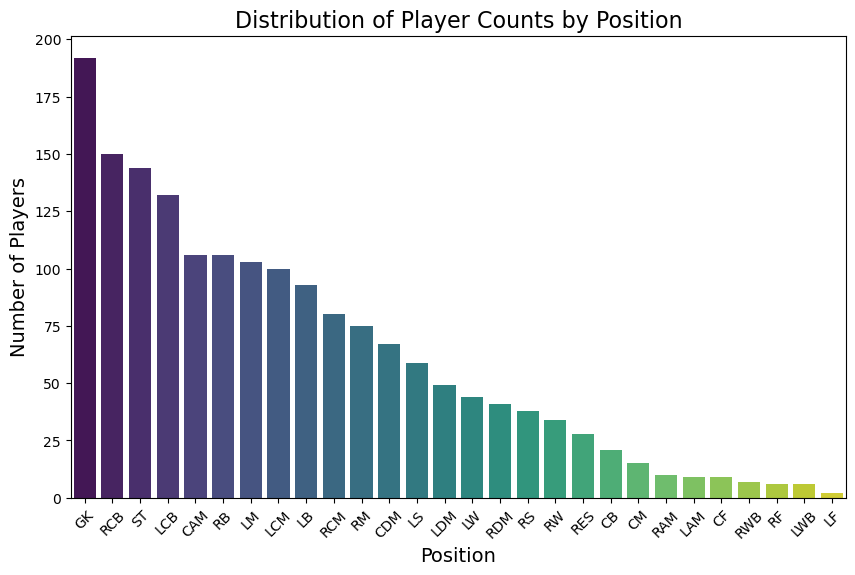

In [39]:
position_counts = df_averaged['club_position'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')

plt.title('Distribution of Player Counts by Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [40]:
def categorize_position(position):
    if position in ['GK', 'RES']:
        return 'Goalkeeper'
    elif position in ['CB', 'RCB', 'LCB', 'RB', 'LB', 'RWB', 'LWB']:
        return 'Defensive'
    elif position in ['CDM', 'RDM', 'LDM', 'CM', 'RCM', 'LCM', 'CAM', 'RAM', 'LAM','LM','RM']:
        return 'Middle'
    elif position in ['ST', 'LS', 'RS', 'LW', 'RW', 'CF', 'RF', 'LF']:
        return 'Forward'
    else:
        return position

df_averaged['club_position'] = df_averaged['club_position'].apply(categorize_position)

df_averaged['club_position'].value_counts()


C:\Users\cicog\AppData\Local\Temp\ipykernel_21156\4205233383.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_averaged['club_position'] = df_averaged['club_position'].apply(categorize_position)


Middle        655
Defensive     515
Forward       336
Goalkeeper    220
Name: club_position, dtype: int64

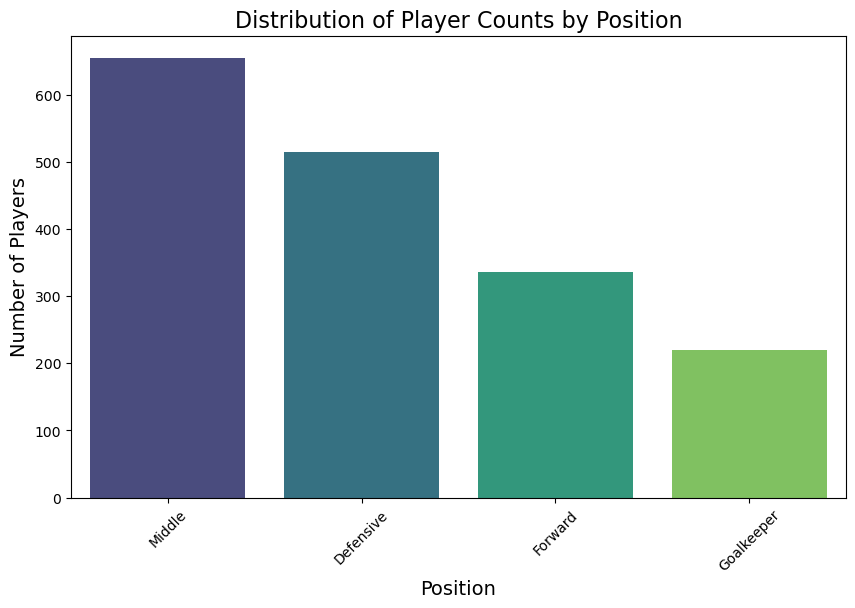

In [41]:
position_counts = df_averaged['club_position'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')

plt.title('Distribution of Player Counts by Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 2.1.1 Membuat posisi menjadi 4 saja yang utama 

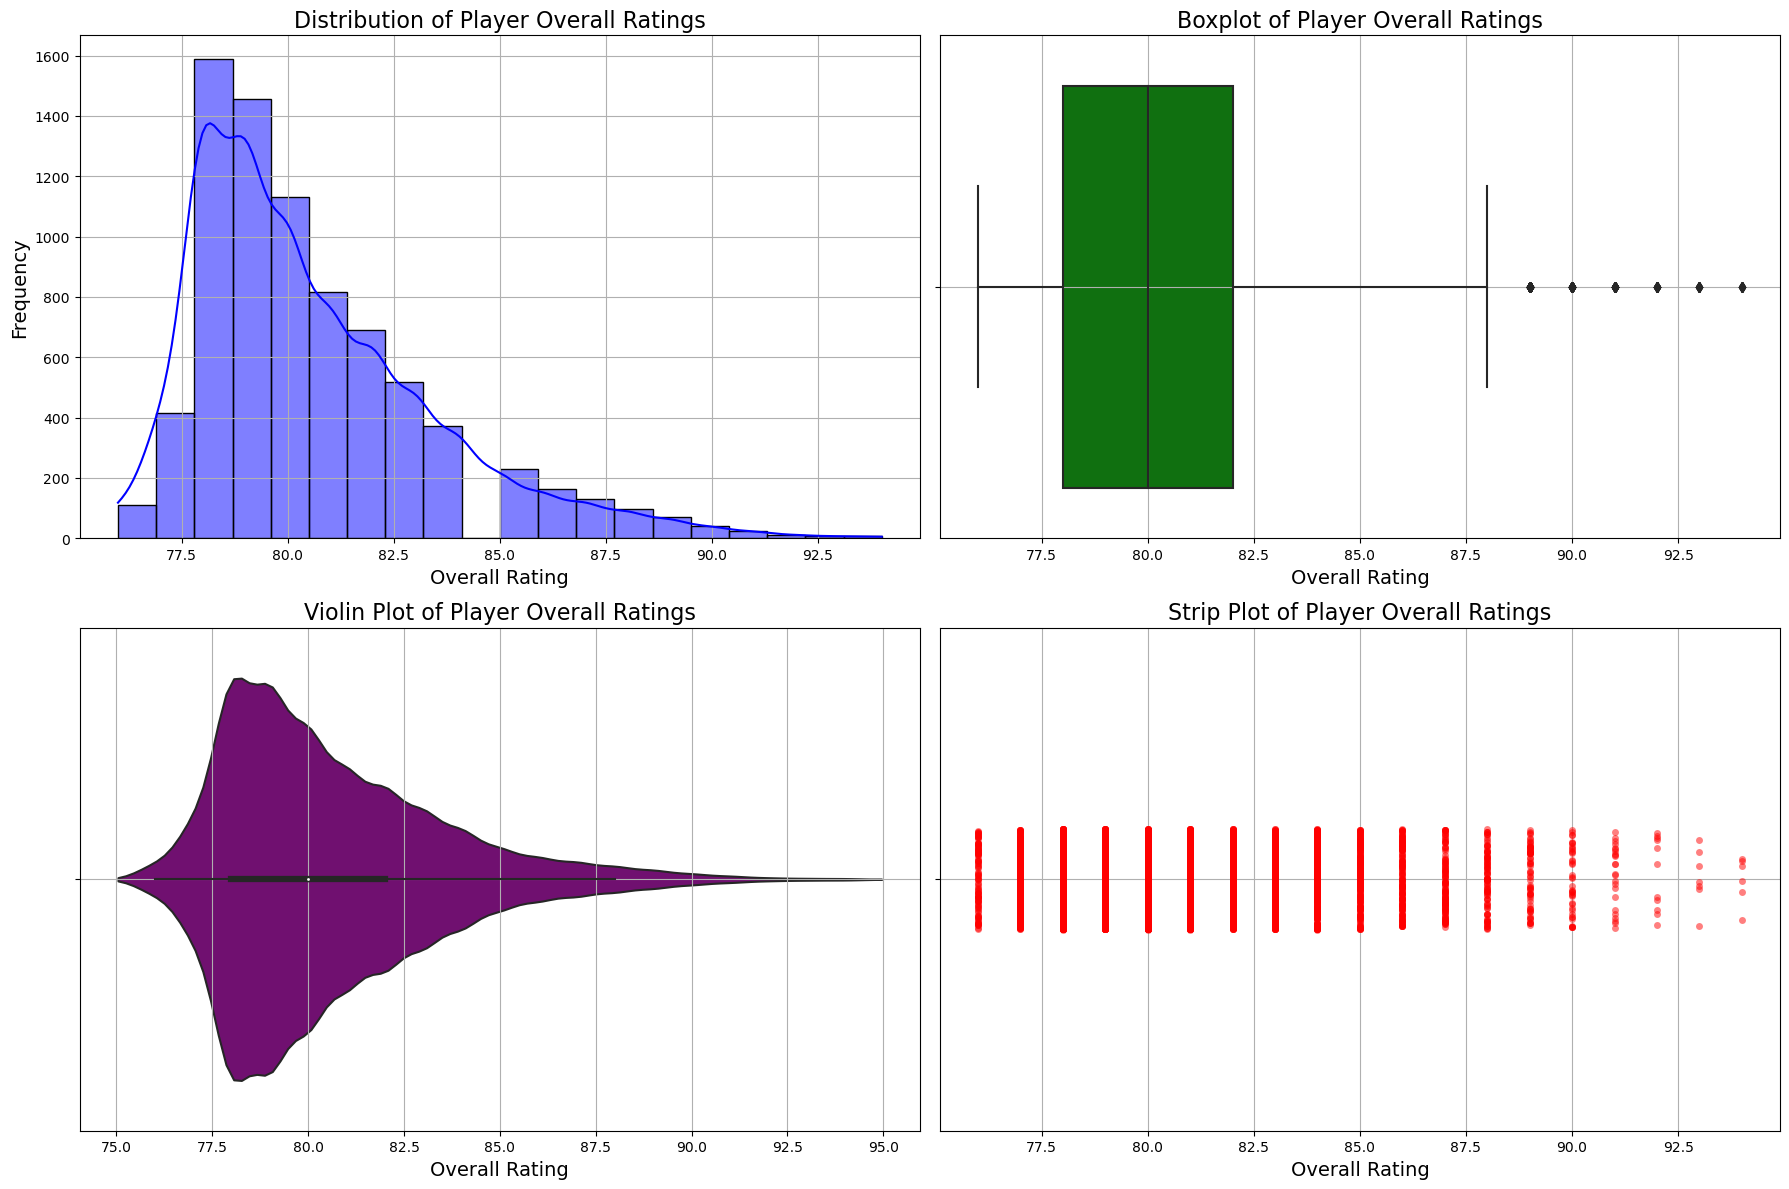

In [42]:
# Mengatur ukuran keseluruhan plot
plt.figure(figsize=(18, 12))

# Histogram dengan KDE
plt.subplot(2, 2, 1)
sns.histplot(df1_05['overall'], bins=20, kde=True, color='blue')
plt.title('Distribution of Player Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)

# Boxplot
plt.subplot(2, 2, 2)
sns.boxplot(x=df1_05['overall'], color='green')
plt.title('Boxplot of Player Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.grid(True)

# Violin plot
plt.subplot(2, 2, 3)
sns.violinplot(x=df1_05['overall'], color='purple')
plt.title('Violin Plot of Player Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.grid(True)

# Strip plot
plt.subplot(2, 2, 4)
sns.stripplot(x=df1_05['overall'], color='red', alpha=0.5)
plt.title('Strip Plot of Player Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.grid(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

## 2.2 Pemisahan entitas GK & 3 posisi lainnya

In [43]:
df_goalkeeper = df_averaged[df_averaged['club_position'] == 'Goalkeeper']
df_defensive = df_averaged[df_averaged['club_position'] == 'Defensive']
df_middle = df_averaged[df_averaged['club_position'] == 'Middle']
df_forward = df_averaged[df_averaged['club_position'] == 'Forward']

# Menghapus atribut yang tidak relevan
# Untuk Goalkeeper
df_goalkeeper.drop(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'], axis=1, inplace=True)

# Untuk posisi selain Goalkeeper (Defensive, Middle, Forward)
df_defensive.drop(['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'], axis=1, inplace=True)
df_middle.drop(['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'], axis=1, inplace=True)
df_forward.drop(['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'], axis=1, inplace=True)

C:\Users\cicog\AppData\Local\Temp\ipykernel_21156\60610899.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_goalkeeper.drop(['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic'], axis=1, inplace=True)
C:\Users\cicog\AppData\Local\Temp\ipykernel_21156\60610899.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_defensive.drop(['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'], axis=1, inplace=True)
C:\Users\cicog\AppData\Local\Temp\ipykernel_21156\60610899.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of

## 2.3 modelling

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
X = df_goalkeeper.drop(['long_name', 'club_position' ,'overall'], axis=1)  # Fitur
y = df_goalkeeper['overall']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2.3.1 Random Forest

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_predict(df, position):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Fitur
    y = df['overall']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Hitung RMSE
    mae = mean_absolute_error(y_test, y_pred)  # Hitung MAE
    r2 = r2_score(y_test, y_pred)  # Hitung R²
    mape = mean_absolute_percentage_error(y_test, y_pred)  # Hitung MAPE
    
    mean_target = y_test.mean()
    accuracy_rf = (1 - rmse / mean_target) * 100  # Hitung akurasi dalam persentase
    
    print(f"Random Forest Regressor for {position}:")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAE = {mae:.2f}")
    print(f"R² = {r2:.2f}")
    print(f"MAPE = {mape:.2f}%")
    print(f"Accuracy = {accuracy_rf:.2f}%\n")

# Melatih model untuk setiap posisi
train_predict(df_goalkeeper, 'Goalkeeper')
train_predict(df_defensive, 'Defensive')
train_predict(df_middle, 'Middle')
train_predict(df_forward, 'Forward')


c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor for Goalkeeper:
RMSE = 0.94
MAE = 0.74
R² = 0.90
MAPE = 0.92%
Accuracy = 98.83%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor for Defensive:
RMSE = 0.95
MAE = 0.73
R² = 0.76
MAPE = 0.92%
Accuracy = 98.80%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regressor for Middle:
RMSE = 1.08
MAE = 0.81
R² = 0.82
MAPE = 1.00%
Accuracy = 98.65%

Random Forest Regressor for Forward:
RMSE = 1.15
MAE = 0.83
R² = 0.85
MAPE = 1.02%
Accuracy = 98.57%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisiasi model dan GridSearchCV
model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Latih model dengan parameter grid
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
print(grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [48]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_metric(y_true, y_pred):
    mean_target = np.mean(y_true)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return (1 - rmse / mean_target) * 100

def train_predict(df, position):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Fitur
    y = df['overall']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    )
    
    # Define scoring metrics
    scoring = {
        'rmse': make_scorer(mean_squared_error, squared=False),
        'mae': make_scorer(mean_absolute_error),
        'r2': 'r2',
        'mape': make_scorer(mean_absolute_percentage_error),
        'accuracy': make_scorer(accuracy_metric)
    }

    # Perform cross-validation
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    print(f"Random Forest Regressor for {position} with Cross-Validation:")
    print(f"Average RMSE: {np.mean(scores['test_rmse']):.2f}")
    print(f"Average MAE: {np.mean(scores['test_mae']):.2f}")
    print(f"Average R²: {np.mean(scores['test_r2']):.2f}")
    print(f"Average MAPE: {np.mean(scores['test_mape']):.2f}%")
    print(f"Average Accuracy: {np.mean(scores['test_accuracy']):.2f}%\n")

# Melatih model untuk setiap posisi
train_predict(df_goalkeeper, 'Goalkeeper')
train_predict(df_defensive, 'Defensive')
train_predict(df_middle, 'Middle')
train_predict(df_forward, 'Forward')


c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Random Forest Regressor for Goalkeeper with Cross-Validation:
Average RMSE: 0.97
Average MAE: 0.74
Average R²: 0.85
Average MAPE: 0.92%
Average Accuracy: 98.78%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Random Forest Regressor for Defensive with Cross-Validation:
Average RMSE: 1.04
Average MAE: 0.77
Average R²: 0.77
Average MAPE: 0.97%
Average Accuracy: 98.70%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Random Forest Regressor for Middle with Cross-Validation:
Average RMSE: 1.16
Average MAE: 0.88
Average R²: 0.76
Average MAPE: 1.09%
Average Accuracy: 98.55%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Random Forest Regressor for Forward with Cross-Validation:
Average RMSE: 1.21
Average MAE: 0.91
Average R²: 0.80
Average MAPE: 1.13%
Average Accuracy: 98.49%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 2.3.2 gradient boost


In [49]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_predict(df, position):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Fitur
    y = df['overall']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Hitung RMSE
    mae = mean_absolute_error(y_test, y_pred)  # Hitung MAE
    r2 = r2_score(y_test, y_pred)  # Hitung R²
    mape = mean_absolute_percentage_error(y_test, y_pred)  # Hitung MAPE
    
    mean_target = y_test.mean()
    accuracy_rf = (1 - rmse / mean_target) * 100  # Hitung akurasi dalam persentase
    
    print(f"GradientBoostingRegressor for {position}:")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAE = {mae:.2f}")
    print(f"R² = {r2:.2f}")
    print(f"MAPE = {mape:.2f}%")
    print(f"Accuracy = {accuracy_rf:.2f}%\n")

# Melatih model untuk setiap posisi
train_predict(df_goalkeeper, 'Goalkeeper')
train_predict(df_defensive, 'Defensive')
train_predict(df_middle, 'Middle')
train_predict(df_forward, 'Forward')


c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GradientBoostingRegressor for Goalkeeper:
RMSE = 0.78
MAE = 0.60
R² = 0.93
MAPE = 0.75%
Accuracy = 99.03%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


GradientBoostingRegressor for Defensive:
RMSE = 0.85
MAE = 0.67
R² = 0.81
MAPE = 0.85%
Accuracy = 98.93%

GradientBoostingRegressor for Middle:
RMSE = 1.05
MAE = 0.81
R² = 0.84
MAPE = 1.00%
Accuracy = 98.69%

GradientBoostingRegressor for Forward:
RMSE = 0.91
MAE = 0.65
R² = 0.91
MAPE = 0.79%
Accuracy = 98.87%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
from sklearn.model_selection import GridSearchCV

# Tentukan parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisiasi model dan GridSearchCV
model = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Latih model dengan parameter grid
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
print(grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [51]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_metric(y_true, y_pred):
    mean_target = np.mean(y_true)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return (1 - rmse / mean_target) * 100

def train_predict(df, position):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Fitur
    y = df['overall']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = GradientBoostingRegressor(
        max_depth=3,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    )
    
    # Define scoring metrics
    scoring = {
        'rmse': make_scorer(mean_squared_error, squared=False),
        'mae': make_scorer(mean_absolute_error),
        'r2': 'r2',
        'mape': make_scorer(mean_absolute_percentage_error),
        'accuracy': make_scorer(accuracy_metric)
    }

    # Perform cross-validation
    scores = cross_validate(model, X, y, cv=5, scoring=scoring)
    
    print(f"Gradient Boosting Regressor for {position} with Cross-Validation:")
    print(f"Average RMSE: {np.mean(scores['test_rmse']):.2f}")
    print(f"Average MAE: {np.mean(scores['test_mae']):.2f}")
    print(f"Average R²: {np.mean(scores['test_r2']):.2f}")
    print(f"Average MAPE: {np.mean(scores['test_mape']):.2f}%")
    print(f"Average Accuracy: {np.mean(scores['test_accuracy']):.2f}%\n")

# Melatih model untuk setiap posisi
train_predict(df_goalkeeper, 'Goalkeeper')
train_predict(df_defensive, 'Defensive')
train_predict(df_middle, 'Middle')
train_predict(df_forward, 'Forward')


c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Gradient Boosting Regressor for Goalkeeper with Cross-Validation:
Average RMSE: 0.87
Average MAE: 0.66
Average R²: 0.88
Average MAPE: 0.82%
Average Accuracy: 98.91%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Gradient Boosting Regressor for Defensive with Cross-Validation:
Average RMSE: 0.92
Average MAE: 0.70
Average R²: 0.82
Average MAPE: 0.87%
Average Accuracy: 98.85%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Gradient Boosting Regressor for Middle with Cross-Validation:
Average RMSE: 1.03
Average MAE: 0.78
Average R²: 0.81
Average MAPE: 0.97%
Average Accuracy: 98.71%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

Gradient Boosting Regressor for Forward with Cross-Validation:
Average RMSE: 1.01
Average MAE: 0.76
Average R²: 0.86
Average MAPE: 0.94%
Average Accuracy: 98.74%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### 2.3.3 Linear Regression


In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_predict(df, position):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Features
    y = df['overall']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    r2 = r2_score(y_test, y_pred)  # Calculate R²
    mape = mean_absolute_percentage_error(y_test, y_pred)  # Calculate MAPE
    
    mean_target = y_test.mean()
    accuracy_rf = (1 - rmse / mean_target) * 100  # Calculate accuracy in percentage
    
    print(f"Linear Regression for {position}:")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAE = {mae:.2f}")
    print(f"R² = {r2:.2f}")
    print(f"MAPE = {mape:.2f}%")
    print(f"Accuracy = {accuracy_rf:.2f}%\n")

# Train and evaluate the model for each position
train_predict(df_goalkeeper, 'Goalkeeper')
train_predict(df_defensive, 'Defensive')
train_predict(df_middle, 'Middle')
train_predict(df_forward, 'Forward')


Linear Regression for Goalkeeper:
RMSE = 1.67
MAE = 1.34
R² = 0.67
MAPE = 1.66%
Accuracy = 97.92%

Linear Regression for Defensive:
RMSE = 1.13
MAE = 0.91
R² = 0.66
MAPE = 1.15%
Accuracy = 98.58%

Linear Regression for Middle:
RMSE = 1.58
MAE = 1.23
R² = 0.62
MAPE = 1.54%
Accuracy = 98.02%

Linear Regression for Forward:
RMSE = 1.24
MAE = 1.00
R² = 0.83
MAPE = 1.24%
Accuracy = 98.46%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

In [53]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

# Mencari hyperparameter terbaik dengan GridSearchCV untuk Linear Regression
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

model = LinearRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Menggunakan data yang sama dari fungsi sebelumnya untuk melatih model dengan parameter grid
X = df_goalkeeper.drop(['long_name', 'club_position', 'overall'], axis=1)
y = df_goalkeeper['overall']

# Latih model dengan parameter grid
grid_search.fit(X, y)

# Dapatkan parameter terbaik
print("Best parameters for Linear Regression:")
print(grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters for Linear Regression:
{'copy_X': True, 'fit_intercept': True, 'positive': True}


In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def train_predict(df, position):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Features
    y = df['overall']  # Target
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Model Linear Regression dengan parameter yang ditentukan
    model = LinearRegression(copy_X=True, fit_intercept=True, positive=True)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
    mae = mean_absolute_error(y_test, y_pred)  # Calculate MAE
    r2 = r2_score(y_test, y_pred)  # Calculate R²
    mape = mean_absolute_percentage_error(y_test, y_pred)  # Calculate MAPE
    
    mean_target = y_test.mean()
    accuracy_rf = (1 - rmse / mean_target) * 100  # Calculate accuracy in percentage
    
    print(f"Linear Regression for {position}:")
    print(f"RMSE = {rmse:.2f}")
    print(f"MAE = {mae:.2f}")
    print(f"R² = {r2:.2f}")
    print(f"MAPE = {mape:.2f}%")
    print(f"Accuracy = {accuracy_rf:.2f}%\n")

# Train and evaluate the model for each position
train_predict(df_goalkeeper, 'Goalkeeper')
train_predict(df_defensive, 'Defensive')
train_predict(df_middle, 'Middle')
train_predict(df_forward, 'Forward')


Linear Regression for Goalkeeper:
RMSE = 1.73
MAE = 1.38
R² = 0.65
MAPE = 1.71%
Accuracy = 97.84%

Linear Regression for Defensive:
RMSE = 1.09
MAE = 0.86
R² = 0.69
MAPE = 1.09%
Accuracy = 98.63%

Linear Regression for Middle:
RMSE = 1.47
MAE = 1.14
R² = 0.68
MAPE = 1.42%
Accuracy = 98.16%

Linear Regression for Forward:
RMSE = 1.18
MAE = 0.98
R² = 0.85
MAPE = 1.21%
Accuracy = 98.53%



c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 

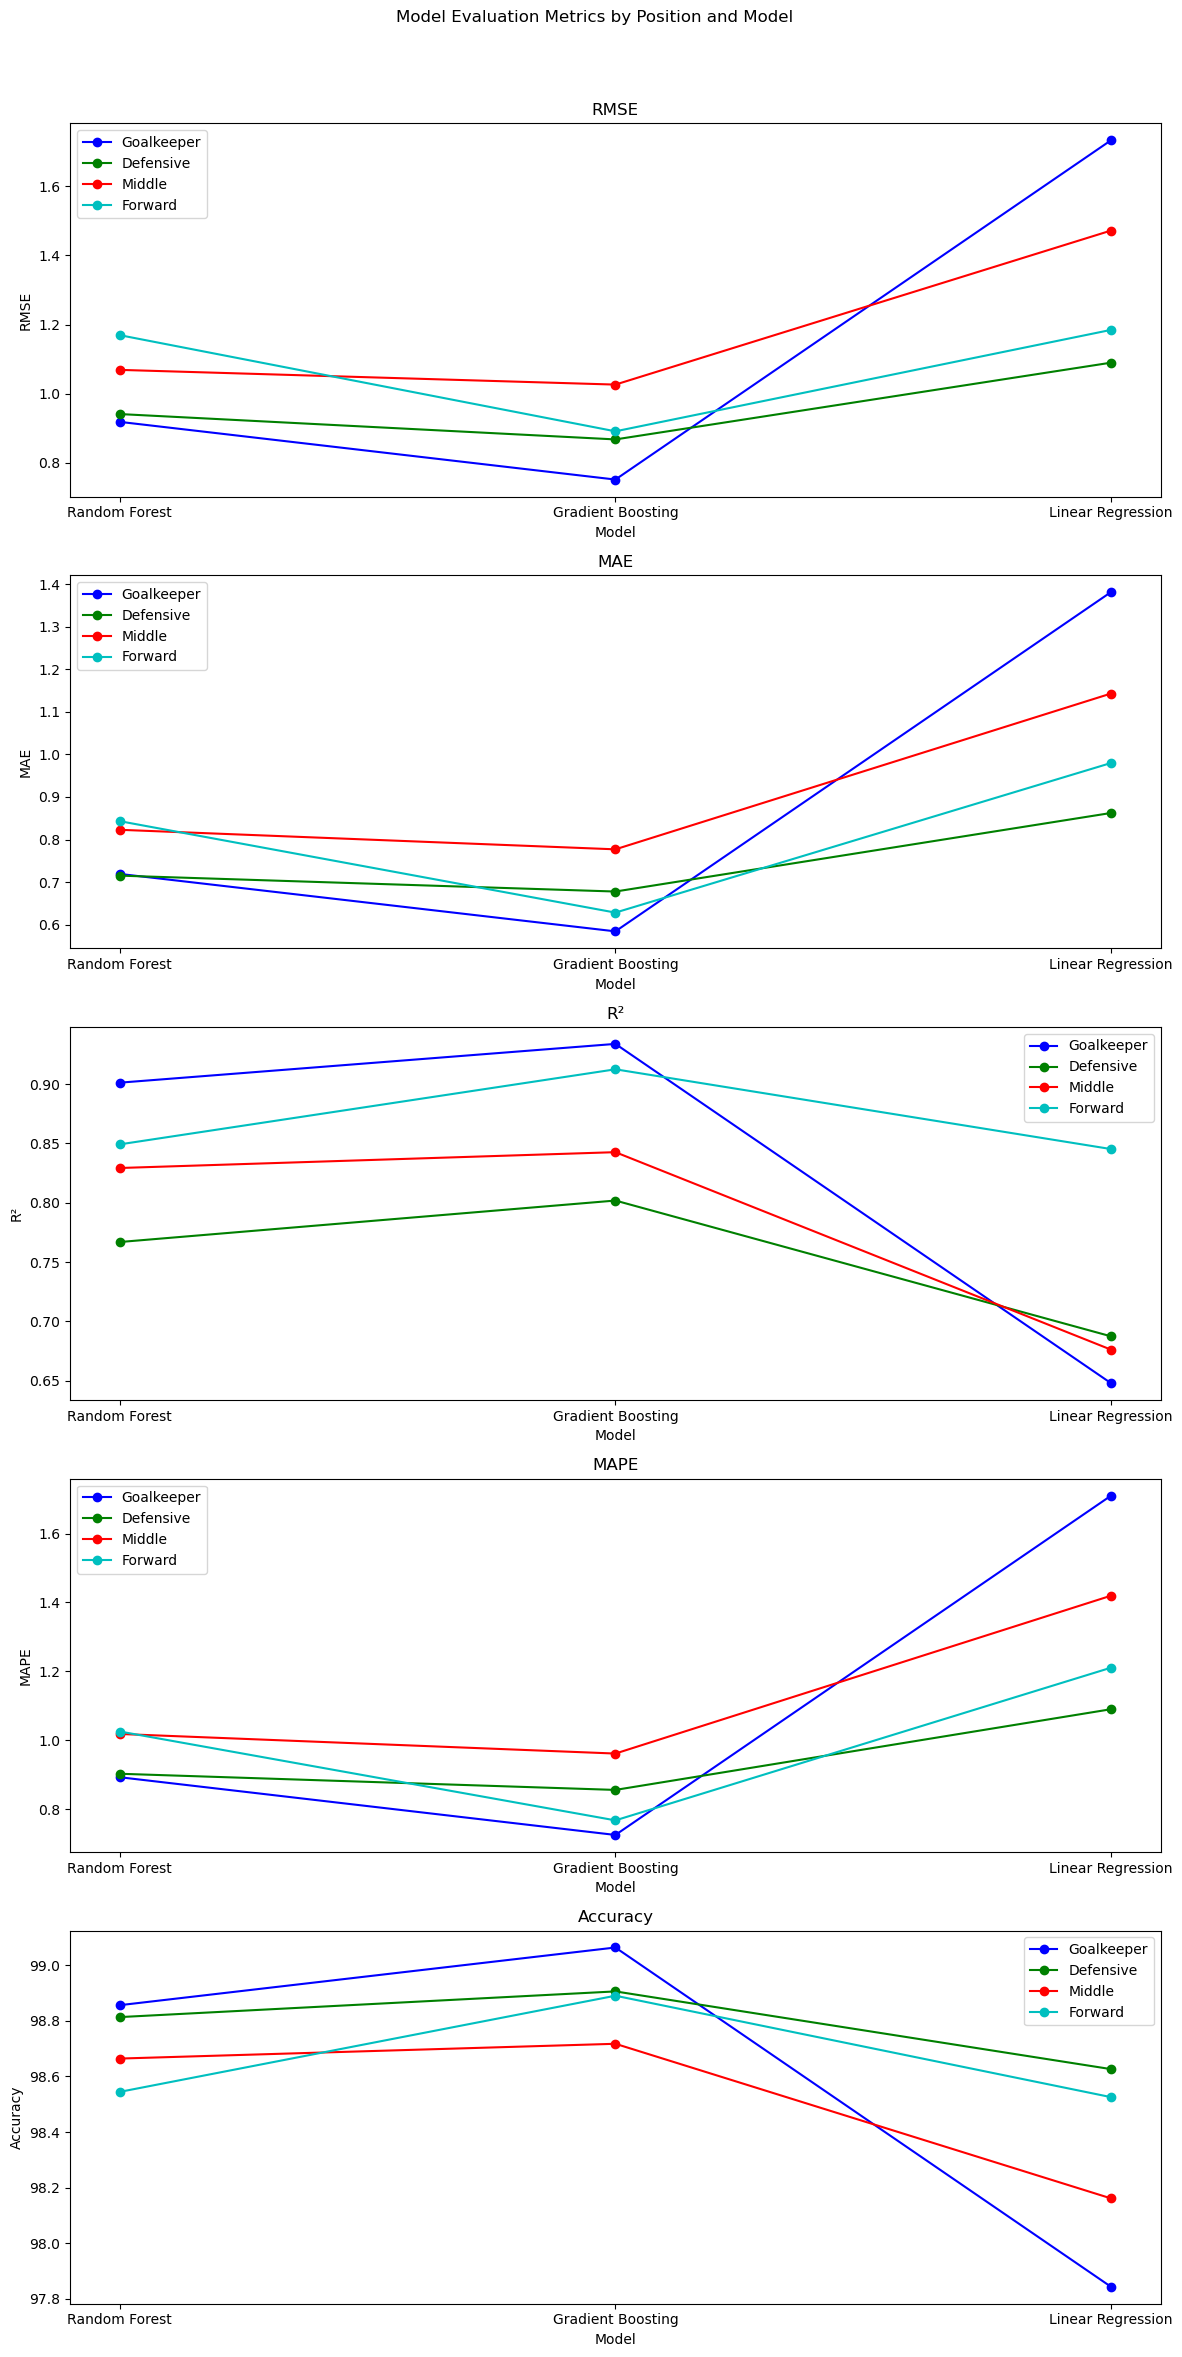

In [55]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_metric(y_true, y_pred):
    mean_target = np.mean(y_true)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return (1 - rmse / mean_target) * 100

# Helper function to train models and collect scores
def train_and_collect_scores(df, position, model, model_name, results):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Features
    y = df['overall']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mean_target = y_test.mean()
    accuracy = (1 - rmse / mean_target) * 100

    results[position][model_name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape,
        'Accuracy': accuracy
    }

# Initialize results dictionary
results = {
    'Goalkeeper': {},
    'Defensive': {},
    'Middle': {},
    'Forward': {}
}

# Define models
models = {
    'Random Forest': RandomForestRegressor(
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        max_depth=3,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    ),
    'Linear Regression': LinearRegression(
        copy_X=True, 
        fit_intercept=True, 
        positive=True
    )
}

# Train models and collect scores for each position
for position, df in {'Goalkeeper': df_goalkeeper, 'Defensive': df_defensive, 'Middle': df_middle, 'Forward': df_forward}.items():
    for model_name, model in models.items():
        train_and_collect_scores(df, position, model, model_name, results)

# Plot results
metrics = ['RMSE', 'MAE', 'R²', 'MAPE', 'Accuracy']
positions = ['Goalkeeper', 'Defensive', 'Middle', 'Forward']
colors = ['b', 'g', 'r', 'c']
model_names = list(models.keys())

fig, axs = plt.subplots(5, 1, figsize=(12, 24))
fig.suptitle('Model Evaluation Metrics by Position and Model')

for i, metric in enumerate(metrics):
    for j, position in enumerate(positions):
        scores = [results[position][model_name][metric] for model_name in model_names]
        axs[i].plot(model_names, scores, label=position, marker='o', color=colors[j])
    
    axs[i].set_title(metric)
    axs[i].set_xlabel('Model')
    axs[i].set_ylabel(metric)
    axs[i].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [57]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_validate

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def accuracy_metric(y_true, y_pred):
    mean_target = np.mean(y_true)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return (1 - rmse / mean_target) * 100

# Helper function to train models and collect scores
def train_and_collect_scores(df, position, model, model_name, results):
    X = df.drop(['long_name', 'club_position', 'overall'], axis=1)  # Features
    y = df['overall']  # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mean_target = y_test.mean()
    accuracy = (1 - rmse / mean_target) * 100

    results[position][model_name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'MAPE': mape,
        'Accuracy': accuracy
    }

# Initialize results dictionary
results = {
    'Goalkeeper': {},
    'Defensive': {},
    'Middle': {},
    'Forward': {}
}

# Define models
models = {
    'Random Forest': RandomForestRegressor(
        max_depth=None,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        max_depth=3,
        min_samples_leaf=2,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    ),
    'Linear Regression': LinearRegression(
        copy_X=True, 
        fit_intercept=True, 
        positive=True
    )
}

# Train models and collect scores for each position
for position, df in {'Goalkeeper': df_goalkeeper, 'Defensive': df_defensive, 'Middle': df_middle, 'Forward': df_forward}.items():
    for model_name, model in models.items():
        train_and_collect_scores(df, position, model, model_name, results)

# Print results
metrics = ['RMSE', 'MAE', 'R²', 'MAPE', 'Accuracy']
positions = ['Goalkeeper', 'Defensive', 'Middle', 'Forward']

for metric in metrics:
    print(f"\n### {metric} ###")
    for position in positions:
        metric_scores = [(model_name, results[position][model_name][metric]) for model_name in models.keys()]
        if metric in ['RMSE', 'MAE', 'MAPE']:
            metric_scores.sort(key=lambda x: x[1])  # Lower is better
        else:
            metric_scores.sort(key=lambda x: x[1], reverse=True)  # Higher is better for R² and Accuracy
        print(f"\nPosition: {position}")
        for model_name, score in metric_scores:
            print(f"{model_name}: {score:.2f}")
        best_model = metric_scores[0][0]
        print(f"Best model for {metric} on {position}: {best_model}\n")


c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the 


### RMSE ###

Position: Goalkeeper
Gradient Boosting: 0.75
Random Forest: 0.92
Linear Regression: 1.73
Best model for RMSE on Goalkeeper: Gradient Boosting


Position: Defensive
Gradient Boosting: 0.87
Random Forest: 0.94
Linear Regression: 1.09
Best model for RMSE on Defensive: Gradient Boosting


Position: Middle
Gradient Boosting: 1.03
Random Forest: 1.07
Linear Regression: 1.47
Best model for RMSE on Middle: Gradient Boosting


Position: Forward
Gradient Boosting: 0.89
Random Forest: 1.17
Linear Regression: 1.18
Best model for RMSE on Forward: Gradient Boosting


### MAE ###

Position: Goalkeeper
Gradient Boosting: 0.58
Random Forest: 0.72
Linear Regression: 1.38
Best model for MAE on Goalkeeper: Gradient Boosting


Position: Defensive
Gradient Boosting: 0.68
Random Forest: 0.72
Linear Regression: 0.86
Best model for MAE on Defensive: Gradient Boosting


Position: Middle
Gradient Boosting: 0.78
Random Forest: 0.82
Linear Regression: 1.14
Best model for MAE on Middle: Gradient Boos

c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\cicog\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Analisis dan Peringkat Model

### Model Terbaik: Gradient Boosting Regressor
**Alasan:**
- Secara konsisten menunjukkan nilai RMSE dan MAE terendah di semua posisi.
- Mencapai nilai R² tertinggi, menunjukkan kecocokan yang lebih baik.
- MAPE terendah, yang berarti akurasi prediksi yang lebih baik.
- Persentase akurasi keseluruhan tertinggi.

### Peringkat Kedua: Random Forest Regressor
**Alasan:**
- Nilai RMSE dan MAE sedikit lebih tinggi dibandingkan Gradient Boosting.
- Nilai R² sedikit lebih rendah tetapi masih menunjukkan kinerja yang kuat.
- Nilai MAPE dan persentase akurasi sedikit lebih rendah dari Gradient Boosting.

### Paling Tidak Efektif: Linear Regression
**Alasan:**
- Nilai RMSE dan MAE secara signifikan lebih tinggi di semua posisi, menunjukkan kesalahan prediksi yang lebih besar.
- Nilai R² lebih rendah, menunjukkan kecocokan yang lebih lemah.
- Nilai MAPE lebih tinggi, yang menyiratkan akurasi prediksi yang lebih rendah.
- Persentase akurasi keseluruhan adalah yang terendah di antara ketiga model.

## Ringkasan
1. **Gradient Boosting Regressor**: Kinerja terbaik dalam hal semua metrik evaluasi. Menunjukkan daya prediksi dan akurasi tertinggi.
2. **Random Forest Regressor**: Masih berkinerja sangat baik, hanya sedikit di belakang Gradient Boosting dalam sebagian besar metrik.
3. **Linear Regression**: Menunjukkan kinerja terlemah, menunjukkan bahwa ini mungkin bukan pilihan terbaik untuk jenis analisis prediktif ini pada dataset ini.
